# Рекомендация тарифов операторов мобильной связи «Мегалайн»

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Нужно построить модель с максимально большим значением *accuracy*. Нужно довести долю правильных ответов по крайней мере до 0.75. Проверить *accuracy* на тестовой выборке.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm




In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv', sep=',')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/users_behavior.csv', sep=',')

In [3]:
df.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
print(df[df['is_ultra'] == 1].count())
print(df[df['is_ultra'] == 0].count())

calls       985
minutes     985
messages    985
mb_used     985
is_ultra    985
dtype: int64
calls       2229
minutes     2229
messages    2229
mb_used     2229
is_ultra    2229
dtype: int64


In [7]:
print(df['calls'].corr(df['minutes']))
print(df['calls'].corr(df['messages']))
print(df['calls'].corr(df['mb_used']))
print(df['messages'].corr(df['minutes']))
print(df['mb_used'].corr(df['minutes']))
print(df['mb_used'].corr(df['messages']))

0.9820832355742293
0.1773845012176953
0.28644151203505447
0.17311022580969077
0.2809669350882149
0.19572112095582148


**Вывод:** Файл открыт и изучен,у нас в наличии 4 столбца и 3214 строк,пропусков нет,имеют нужный формат,данные готовы для работы.  Посмотрел на балансировку классов, абонентов с тарифом "смарт" почти в 2.3 раза больше, чем с тарифом "ультра", это видно по средней и медиане.Наблюдается мультиколлинеарность между *calls* и *minutes*.

## Разбейте данные на выборки

In [8]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [9]:
print(features.shape)
print(target.shape)

(3214, 4)
(3214,)


In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.4, random_state=12345,
                                                                            stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, 
                                                                            test_size=0.5, random_state=12345, 
                                                                            stratify=target_test)

In [11]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


**Вывод:** Данные были разбиты на *признаки* и *целевые признаки*,далее с соотношением 3:1:1 разбили на *тренировочную*,*тестовую* и *валидационную* соответственно,при проверке все соотношения совпадают.

## Исследуйте модели

In [12]:
best_model_rf = None
best_result_rf = 0
best_depth_rf = 0
best_est_rf = 0
for est in tqdm(range(1, 20)):
    for depth in range(1,9):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_train, target_train)
        result_rf = model_rf.score(features_valid, target_valid)
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_est_rf = est
            best_depth_rf = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)
print("Depth на валидационной выборке:", best_depth_rf)
print("Число деревьев:", best_est_rf)

100%|██████████| 19/19 [00:04<00:00,  4.42it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8118195956454122
Depth на валидационной выборке: 8
Число деревьев: 19


**Вывод:** Исследован алгоритм *случайный лес*, взята глубина от 1 до 9 и числом деревьев от 1 до 20.Наилучшая модель на валидационной выборке с глубиной 8 и числом деревьев равных 19, ресурсозатратность же равна 4.98 it/s.

In [13]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000).fit(features_valid, target_valid)
predictions_lr = model_lr.predict(features_valid) 
model_lr = accuracy_score(target_valid, predictions_lr) 
        
print('Accuracy валидационной выборки логической регрессии =', model_lr)

Accuracy валидационной выборки логической регрессии = 0.7418351477449455


**Вывод:** При проверки валидационной выборки алгоритма *логической регрессии* Accuracy = 0.7418351477449455.

In [14]:
best_model_dt = None
best_depth_dt = 0
best_result_dt = 0
for depth in tqdm(range(1, 10)):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth).fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    result_dt = accuracy_score(predictions_valid_dt, target_valid)
    if best_result_dt < result_dt:
        best_model_dt = model_dt
        best_depth_dt = depth
        best_result_dt = result_dt
print('Accuracy наилучшей модели на валидационной выборке:', best_result_dt)
print('Максимальная глубина =', best_depth_dt)

100%|██████████| 9/9 [00:00<00:00, 174.90it/s]

Accuracy наилучшей модели на валидационной выборке: 0.80248833592535
Максимальная глубина = 8


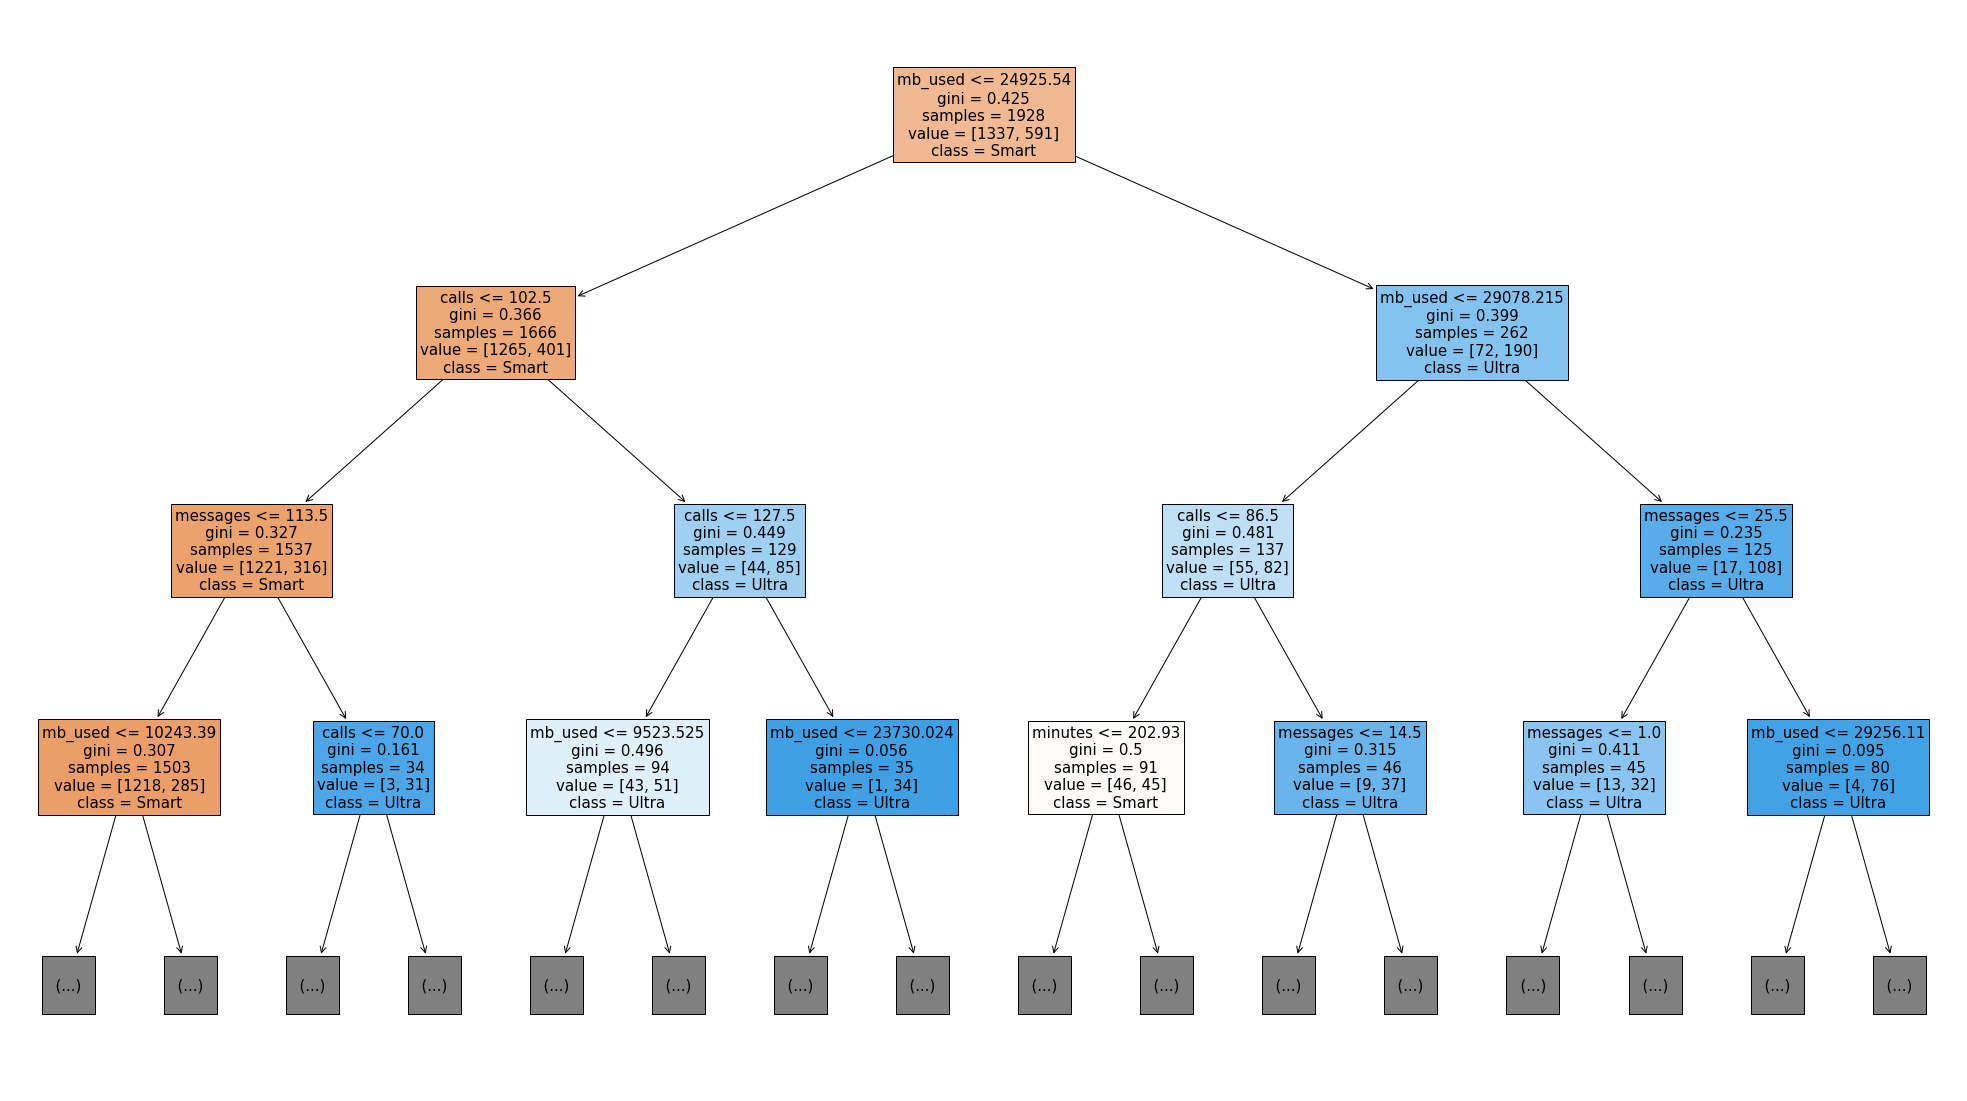

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_dt, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15,
                   max_depth = 3
                   )

In [16]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 12345,
 'splitter': 'best'}

**Вывод:** Исследован алгоритм *дерево решений* на валидационной выборке, большее *Accuracy* у глубины равной 8, ресурсозатратность равна 147.05 it/s.

**Общий вывод:** Лучше всего показал себя алгоритм *случайный лес* с результатом  = 0.8118195956454122.

## Проверьте модель на тестовой выборке

In [17]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators = 19, max_depth = 8).fit(features_train, target_train)
predictions_test = model_rf.predict(features_test)
result_test = accuracy_score(predictions_test, target_test)
print('Accuracy RandomForestClassifier на тестовой выборке:', result_test)

Accuracy RandomForestClassifier на тестовой выборке: 0.807153965785381


**Вывод:** Так как алгоритм *случайный лес* дал лучший результат,он был проверен на тестовой выборке,резульат = 0.807153965785381.Можно заметить что результаты *Accuracy* при обучении *случайного леса* и проверки его на тестовой выборке примерно равны.

## (бонус) Проверьте модели на адекватность

In [18]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345).fit(features_train, target_train)
result_dc = model_dc.score(features_valid, target_valid)

print('Accuracy на адекватность =', result_dc)

Accuracy на адекватность = 0.6936236391912908


**Вывод:** Проверили алгоритм на адекватность, выбрали стратегию *most_frequent*, *Accuracy* = 0.6936236391912908.

## Вывод

- Предоставленные данные изучены, DataFrame имеет 4 столбца и 3214 строк,пропусков нет, имеют нужный формат по каждому столбцу.Посмотрел на балансировку классов, абонентов с тарифом "смарт" почти в 2.3 раза больше, чем с тарифом "ультра", это видно по средней и медиане.Наблюдается мультиколлинеарность между calls и minutes.
- были исследованы алгоритмы Decision Tree Classifier,Logistic Regression и RandomForestClassifier, наилучший показатель Accuracy у RandomForestClassifier с гиперпараметрами *n_estimators* равным - 19 и *max_depth* равным 8 и *Accuracy* равен значению 0.8118195956454122.
- Алгоритм RandomForestClassifier с гиперапараметрами n_estimators равным - 19 и max_depth равным 8 была проверена на тестовой выборке и Accuracy равен значению 0.807153965785381.
- Проверил алгоритм RandomForestClassifier на адекватность, выбрав стратегию *most_frequent*, Accuracy равен значению 0.6936236391912908.

Можно заметить что результаты лучшей модели *Accuracy* при обучении *случайного леса* и проверки его на тестовой выборке примерно равны.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
